<a href="https://colab.research.google.com/github/ckwei379/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專題實作 #01：鐵達尼號存活預測

環境準備

In [3]:
import pandas as pd
import numpy as np

In [4]:
# 載入 Titanic 資料集的 `train.csv` 資料集
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# 觀察資料
print(df.info())
print()

# 找出具有缺失值的欄位
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing Columns：")
print(missing_columns)
print()

# 資料清理
df["Sex"] = df["Sex"].map({"female":0, "male":1})
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Cabin"] = df["Cabin"].fillna(0)
df = pd.get_dummies(df, columns=["Embarked"], dtype=int)
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
print(df.head())
print()

# 確認資料清理後是否尚有缺失值
has_missing = df.isna().values.any()
print("DataFrame has missing values：", has_missing)
print()

# 將清理後的資料複製存入訓練集
df_train = df.copy()

# 確認訓練集的資料
print(df_train.head())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Columns：
Age         177
Cabin       687
Embarked      2
dtype: int64

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    1  22.0      1      0   7.2500           0           0 

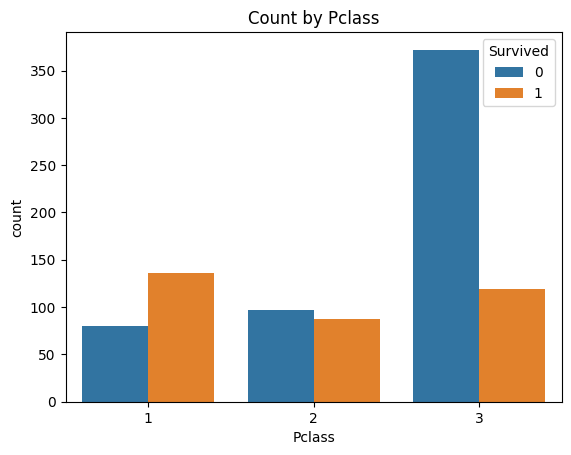

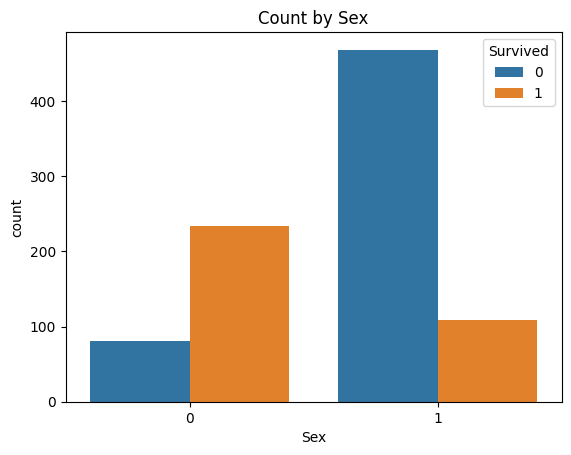

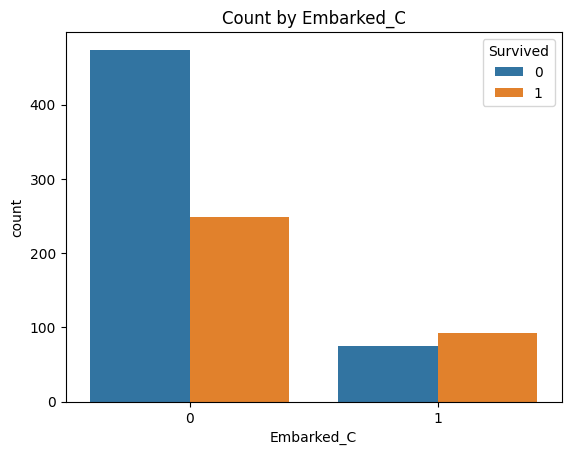

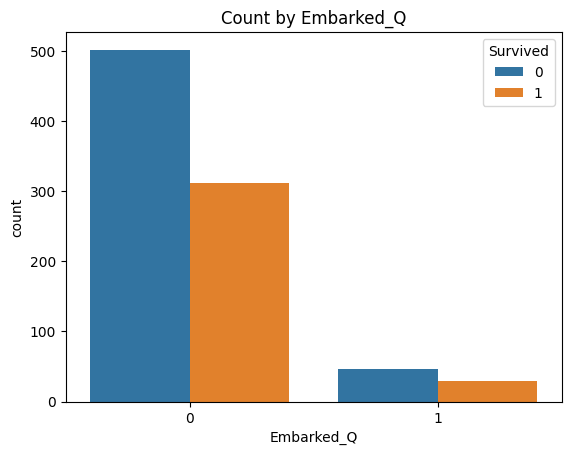

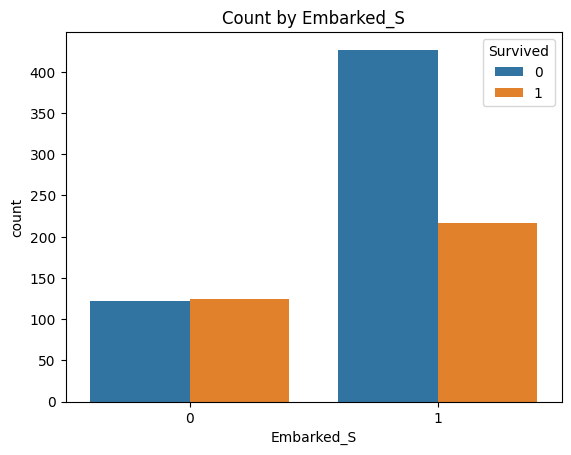

Correlation Matrix：
               Age      Fare  Survived
Age       1.000000  0.091566 -0.069809
Fare      0.091566  1.000000  0.257307
Survived -0.069809  0.257307  1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Count by Pclass")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Count by Sex")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Embarked_C", hue="Survived", data=df)
plt.title("Count by Embarked_C")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Embarked_Q", hue="Survived", data=df)
plt.title("Count by Embarked_Q")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Embarked_S", hue="Survived", data=df)
plt.title("Count by Embarked_S")
plt.show()

correlation = df[["Age", "Fare", "Survived"]].corr()
print("Correlation Matrix：")
print(correlation)

In [74]:
columns_X = list(set(df_train.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_train[columns_X]
train_y = df_train[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)

[0.78212291 0.78089888 0.78651685 0.76966292 0.8258427 ]
